# 10 Boxes analysis.

In [13]:
from module_files_plots import Plots, FileFuncs, Fitter
from read_theory_to_xi import ComputeModelsCoLoRe

In [10]:
from pathlib import Path
import matplotlib.pyplot as plt

We need to provide the following files to the theory object:

In [4]:
theory_path=Path('/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000')
bias_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/BzBlue.txt')
nz_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/NzBlue.txt')
pk_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/Pk_CAMB_test.dat')

Create theory object:

In [5]:
theory = ComputeModelsCoLoRe(
    box_path=theory_path,
    source=2,
    nz_filename=nz_filename,
    pk_filename=pk_filename,
    param_cfg_filename='/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000/out_params.cfg',
    bias_filename=bias_filename,
    apply_lognormal=True)

Read boxes output. We will use the analysis of the 10 boxes here:

In [6]:
boxes_path=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/binned_analysis_with_error')

boxes = FileFuncs.mix_sims(
    FileFuncs.get_full_path(boxes_path,
                            rsd=True,
                            rmin=0.1, rmax=200, N_bins=41,
                            zmin=0.5, zmax=0.7, #Also results for 0.7 and 0.9
                            nside=2)
)

available_sims.py can be used to search for configurations available for the previous cell:

In [20]:
%run available_sims.py --path /global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/binned_analysis_with_error

+-------+-------+------+------+------+------+-----+
| nside |  rsd  | rmin | rmax | zmin | zmax |  N  |
+-------+-------+------+------+------+------+-----+
|   1   | True  | 0.1  | 200  | 0.7  | 0.9  | 12  |
|   2   | True  | 0.1  | 400  | 0.7  | 0.9  | 48  |
|   2   | True  | 0.1  | 200  | 0.6  | 0.9  | 144 |
|   2   | True  | 0.1  | 200  |  0   | 1.42 | 48  |
|   2   | True  | 0.1  | 200  | 0.9  | 1.1  | 480 |
|   2   | True  | 0.1  | 200  | 0.3  | 0.5  | 480 |
|   2   | True  | 0.1  | 200  | 1.1  | 1.4  | 48  |
|   2   | True  | 0.1  | 200  | 0.5  | 0.7  | 480 |
|   2   | True  | 0.1  | 200  | 0.1  | 0.3  | 48  |
|   2   | True  | 0.1  | 200  | 0.7  | 0.9  | 480 |
|   2   | True  | 0.1  | 300  | 0.7  | 0.9  | 48  |
|   2   | False | 0.1  |  50  | 0.5  | 0.7  | 192 |
|   2   | False | 0.1  |  50  | 0.5  | 0.7  | 192 |
|   2   | False | 0.1  |  50  | 0.5  | 0.7  | 192 |
|   2   | False | 0.1  |  50  | 0.5  | 0.7  | 192 |
|   2   | False | 0.1  |  50  | 0.5  | 0.7  | 192 |
|   2   | Fa

We should have 480 boxes for analysis, that is 48 pixels for each of the 10 CoLoRe boxes.

In [7]:
len(boxes)

480

We can easily make plots using Plots.plot_data, Plots.plot_theory. These methods are defined in module_files_plots.Plots

In [8]:
z = theory.get_zeff(zmin=0.5, zmax=0.7)

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


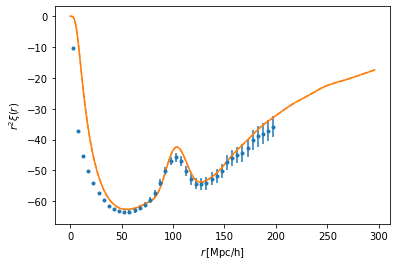

In [11]:
fig, ax = plt.subplots()
pole=2

Plots.plot_data(pole=pole, boxes=boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_theory(pole=pole, theory=theory, z=z, bias=1.3, rsd=True, ax=ax, plot_args=dict(c='C1', label='model'))

# Fitter

To perform a fit, we use the class Fitter from module_files_plots:

In [14]:
fitter = Fitter(boxes=boxes, z=z, theory=theory, poles=[0,2], rsd=True, bias0=1.3,
    smooth_factor0=1, smooth_factor_rsd0=1, smooth_factor_cross0=1)

fitter.run_fit(free_params=['bias'])

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


In [15]:
print(fitter.pars_tab())

| name                |   value |   stderr |   stderror(%) |   init value |   min |   max | vary   |
|---------------------|---------|----------|---------------|--------------|-------|-------|--------|
| bias                |   1.316 |    0.001 |         0.069 |          1.3 |     0 |   inf | True   |
| smooth_factor       |   1     |    0     |         0     |          1   |     0 |   inf | False  |
| smooth_factor_rsd   |   1     |    0     |         0     |          1   |     0 |   inf | False  |
| smooth_factor_cross |   1     |    0     |         0     |          1   |     0 |   inf | False  |


If more than one parameter is free, we can get the correlation between these values by using.

In [16]:
print(fitter.corrs_tab())

| name   | name   | corr   |
|--------|--------|--------|


We can plot the best fit as well:

In [17]:
fitter.z

0.5990093404246088

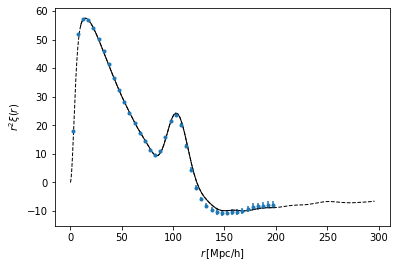

In [18]:
fig, ax = plt.subplots()
pole=0

Plots.plot_data(pole=pole, boxes=boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1, label='best fit'))